WEEK 1

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Automobile.csv to Automobile.csv


In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.3 MB/s eta 0:00:00


=== Linear Regression (Automobile.csv) ===
MSE       : 0.3192074809001261
RMSE      : 0.564984496159077
R-squared : 0.7668954954631667


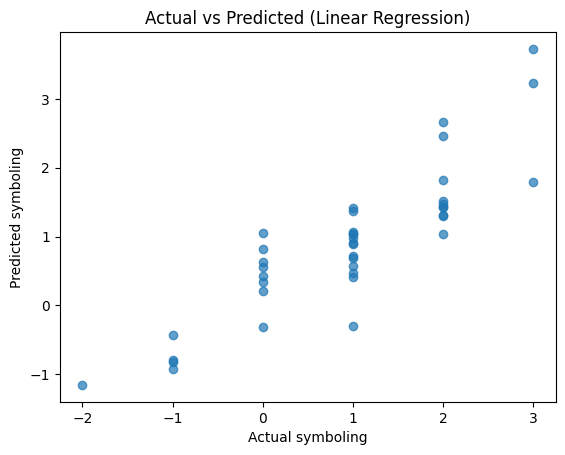

In [6]:
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Membaca dataset Automobile
df_auto = pd.read_csv("/content/Automobile.csv")

# 2. (Opsional) Membersihkan data
#    - Pastikan kolom 'symboling' tidak ada NaN
df_auto = df_auto.dropna(subset=["symboling"])
#    - Hapus baris lain yang memiliki nilai NaN
df_auto = df_auto.dropna()

# 3. Pisahkan fitur (X) dan target (y)
X_auto = df_auto.drop("symboling", axis=1)
y_auto = df_auto["symboling"]

# 4. One-Hot Encoding (jika ada kolom kategorik)
X_auto = pd.get_dummies(X_auto)

# 5. Bagi data menjadi training set dan test set
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(
    X_auto, y_auto, random_state=0
)

# 6. Inisialisasi model Linear Regression
linreg_model = LinearRegression()

# 7. Latih model
linreg_model.fit(X_train_auto, y_train_auto)

# 8. Prediksi pada data uji
y_pred_auto = linreg_model.predict(X_test_auto)

# 9. Evaluasi Model
#    - Mean Squared Error (MSE)
mse_auto = mean_squared_error(y_test_auto, y_pred_auto)
#    - Root Mean Squared Error (RMSE)
rmse_auto = np.sqrt(mse_auto)
#    - R-squared
r2_auto = r2_score(y_test_auto, y_pred_auto)

# 10. Cetak hasil evaluasi
print("=== Linear Regression (Automobile.csv) ===")
print("MSE       :", mse_auto)
print("RMSE      :", rmse_auto)
print("R-squared :", r2_auto)

# (Opsional) Plot prediksi vs aktual
plt.figure()
plt.scatter(y_test_auto, y_pred_auto, alpha=0.7)
plt.xlabel("Actual symboling")
plt.ylabel("Predicted symboling")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


## 1. Automobile: Regresi Linear

### Persamaan Model
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

$$\hat{y}$$= Merupakan nilai prediksi dari model. Ini adalah nilai yang diharapkan (diperkirakan) berdasarkan kombinasi linier dari fitur-fitur.
  
**$$x_1, x_2, \dots, x_n\$$** =Merupakan fitur-fitur (variabel independen) yang digunakan untuk memprediksi nilai target. Misalnya, pada dataset Automobile, fitur bisa berupa atribut mobil seperti harga, berat, atau ukuran mesin.
  
**$$\beta_0\$$** =Adalah intercept (konstanta), yaitu nilai yang diprediksi ketika semua fitur bernilai nol. Ini merupakan titik awal dari garis prediksi.
  
**$$\beta_1, \beta_2, \dots, \beta_n\$$** =Adalah koefisien yang menunjukkan seberapa besar pengaruh masing-masing fitur terhadap prediksi. Nilai koefisien ini menentukan kemiringan atau “gradien” dari garis yang membentuk model.

### Fungsi Cost (Least Squares)
$$
J(\beta) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

- **$$y_i\$$** =Nilai aktual (observasi) dari target untuk sampel ke-\(i\).
  
- **$$\hat{y}_i\$$** =Nilai prediksi model untuk sampel ke-\(i\).
  
- **$$n\$$** =Jumlah total sampel dalam dataset.
  
- **$$J(\beta)\$$** =Merupakan fungsi cost yang mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi. Metode Least Squares berusaha menemukan nilai parameter \(\beta\) yang meminimalkan fungsi ini sehingga prediksi model sedekat mungkin dengan nilai nyata.

### Metrik Evaluasi
- **Mean Squared Error (MSE):**
  $$
  \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  $$
  MSE mengukur seberapa besar rata-rata kesalahan kuadrat antara nilai prediksi dan aktual; semakin kecil MSE, semakin baik model dalam memprediksi data.
  
- **Root Mean Squared Error (RMSE):**
  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$
  RMSE memberikan kesalahan prediksi dalam satuan yang sama dengan target, sehingga lebih mudah diinterpretasikan.
  
- **R-squared (R²):**
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
  $$
  \(R^2\) mengukur proporsi variansi data yang dapat dijelaskan oleh model. Nilai yang mendekati 1 berarti model mampu menjelaskan sebagian besar variansi data, sedangkan nilai yang rendah menunjukkan model kurang baik.

---

In [7]:
from google.colab import files
uploaded = files.upload()


Saving HeartDisease.csv to HeartDisease.csv



=== HeartDisease.csv ===
Kolom dalam dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
Nilai unik pada 'num': [0 2 1 3 4]

Model Logistic Regression - HeartDisease
Koefisien: [[0.2032841]]
Intercept: [-0.23039223]

Evaluasi Model (HeartDisease):
Accuracy: 0.5131578947368421
ROC AUC : 0.4920304920304921

Classifi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


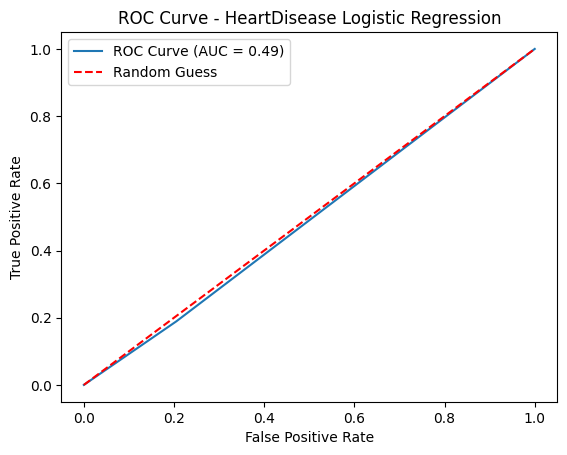

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_curve, roc_auc_score)

# --- HeartDisease Dataset ---
# 1. Baca dataset dan tampilkan informasi dasar
df_hd = pd.read_csv("/content/HeartDisease.csv")
print("\n=== HeartDisease.csv ===")
print("Kolom dalam dataset:", df_hd.columns.tolist())
print(df_hd.head())

# 2. Periksa kolom 'num' dan tampilkan nilai unik
if 'num' not in df_hd.columns:
    raise ValueError("Kolom 'num' tidak ditemukan di dataset HeartDisease.csv.")
else:
    print("Nilai unik pada 'num':", df_hd['num'].unique())

# 3. Buat target biner dari kolom 'num'
#    0 -> tidak ada penyakit jantung, >0 -> ada penyakit jantung
df_hd['target'] = (df_hd['num'] > 0).astype(int)

# 4. Seleksi fitur dan target
#    Fitur: hanya kolom 'fbs'
X_hd = df_hd[['fbs']]
y_hd = df_hd['target']

# 5. Bagi data menjadi training set dan test set
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X_hd, y_hd, random_state=42)

# 6. Inisialisasi dan latih model Logistic Regression
model_hd = LogisticRegression(max_iter=1000)
model_hd.fit(X_train_hd, y_train_hd)

# 7. Tampilkan parameter model (koefisien dan intercept)
print("\nModel Logistic Regression - HeartDisease")
print("Koefisien:", model_hd.coef_)
print("Intercept:", model_hd.intercept_)

# 8. Prediksi dan evaluasi
y_pred_hd = model_hd.predict(X_test_hd)
y_prob_hd = model_hd.predict_proba(X_test_hd)[:, 1]

acc_hd = accuracy_score(y_test_hd, y_pred_hd)
roc_auc_hd = roc_auc_score(y_test_hd, y_prob_hd)

print("\nEvaluasi Model (HeartDisease):")
print("Accuracy:", acc_hd)
print("ROC AUC :", roc_auc_hd)
print("\nClassification Report:")
print(classification_report(y_test_hd, y_pred_hd))
print("Confusion Matrix:")
print(confusion_matrix(y_test_hd, y_pred_hd))

# 9. Plot ROC Curve
fpr_hd, tpr_hd, _ = roc_curve(y_test_hd, y_prob_hd)
plt.figure()
plt.plot(fpr_hd, tpr_hd, label=f"ROC Curve (AUC = {roc_auc_hd:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - HeartDisease Logistic Regression")
plt.legend()
plt.show()


## 2. Heart Disease: Logistic Regression

### Persamaan Model

#### Fungsi Linear (Logit)
$$
z = \beta_0 + \beta_1 \times \text{fbs}
$$

- **$$z\$$** Merupakan skor linier yang dihitung sebagai kombinasi linier dari fitur. Dalam kasus ini, hanya fitur *fbs* (fasting blood sugar) yang digunakan.
  
- **$$\beta_0\$$** Intercept atau konstanta, nilai awal ketika fitur bernilai nol.
  
- **$$\beta_1\$$** Koefisien yang menunjukkan seberapa besar pengaruh *fbs* terhadap nilai \(z\).

#### Fungsi Sigmoid (Logistic)
$$
\hat{p} = \frac{1}{1 + e^{-z}}
$$

- **$$\hat{p}\$$** Merupakan probabilitas bahwa sampel termasuk ke dalam kelas 1 (misalnya, ada penyakit jantung). Fungsi sigmoid mengubah nilai z yang dapat bernilai dari -∞ sampai +∞ menjadi nilai antara 0 dan 1.
  
- Fungsi ini memberikan "kurva S" yang halus, yang memungkinkan interpretasi nilai $$\hat{p}\$$ sebagai probabilitas.

#### Aturan Keputusan
- Jika $$\hat{p} \geq 0.5\ $$ maka model mengklasifikasikan sampel sebagai kelas 1.
- Jika $$\hat{p} < 0.5\$$, maka sampel diklasifikasikan sebagai kelas 0.

### Fungsi Log-Likelihood
$$
\ell(\beta) = \sum_{i=1}^{n} \left[ y_i \log(\hat{p}_i) + (1-y_i) \log(1-\hat{p}_i) \right]
$$

- **$$y_i\$$** Nilai aktual (0 atau 1) untuk sampel ke-\(i\).
  
- **$$\hat{p}_i\ $$**  
  Probabilitas yang diprediksi untuk sampel ke-i bahwa $$y_i=1\$$.
  
- Fungsi log-likelihood ini mengukur seberapa "cocok" model dengan data. Dengan memaksimalkan nilai $$ \ell(\beta)\ $$, kita mencari parameter $$ (\beta)\ $$ yang membuat model memberikan probabilitas tinggi pada sampel yang benar-benar positif dan probabilitas rendah pada sampel negatif.

### Metrik Evaluasi
## 1. Recall (Sensitivitas)

**Definisi:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **TP (True Positive)**: Model memprediksi positif, dan kenyataannya memang positif.  
- **FN (False Negative)**: Model memprediksi negatif, padahal sebenarnya positif.

**Penjelasan:**
- *Recall* mengukur seberapa banyak model berhasil menemukan kasus positif yang sebenarnya.  
- Semakin tinggi *Recall*, semakin sedikit kasus positif yang lolos (tidak terdeteksi).

---

## 2. Precision

**Definisi:**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **TP (True Positive)**: Model memprediksi positif, dan kenyataannya memang positif.  
- **FP (False Positive)**: Model memprediksi positif, padahal sebenarnya negatif.

**Penjelasan:**
- *Precision* mengukur ketepatan model saat memprediksi kelas positif.  
- Semakin tinggi *Precision*, semakin sedikit model memberikan prediksi positif yang keliru.

---

## 3. F1-Score

**Definisi:**
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Penjelasan:**
- *F1-Score* adalah rata-rata harmonis antara *Precision* dan *Recall*.  
- Nilai F1 yang tinggi berarti keseimbangan yang baik antara *Precision* dan *Recall*.

---

## 4. ROC Curve (Receiver Operating Characteristic)

**Konsep Dasar:**
- *ROC Curve* adalah grafik yang memplot **True Positive Rate (TPR)** terhadap **False Positive Rate (FPR)** di berbagai nilai ambang (*threshold*).  

### 4.1 True Positive Rate (TPR) / Recall

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

- Ini sama dengan *Recall*.

### 4.2 False Positive Rate (FPR)

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

- **FP (False Positive)**: Model memprediksi positif, padahal sebenarnya negatif.  
- **TN (True Negative)**: Model memprediksi negatif, dan kenyataannya memang negatif.

**Penjelasan:**
- Setiap titik pada kurva ROC menggambarkan kombinasi (TPR, FPR) untuk nilai ambang tertentu (misalnya 0.5, 0.6, dst.).  
- Dengan menggeser ambang prediksi (threshold), model akan menghasilkan pasangan (TPR, FPR) yang berbeda.

---

## 5. AUC (Area Under the Curve)

**Konsep Dasar:**
- *AUC* adalah luas area di bawah kurva ROC (ROC Curve).  
- Semakin besar nilai AUC (mendekati 1), semakin baik model dalam membedakan kelas positif dan negatif.

**Interpretasi:**
- AUC = 0.5 menunjukkan model sama saja seperti menebak secara acak.  
- AUC > 0.9 umumnya menandakan model yang sangat baik dalam membedakan kelas.

**Rumus Umum AUC (Secara Konseptual):**
Walaupun secara praktis AUC sering dihitung dengan metode numerik (trapezoidal rule), konsep dasarnya dapat diartikan sebagai:

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d(\text{FPR})
$$

- Di mana \(\text{TPR}(\text{FPR})\) adalah fungsi TPR yang bergantung pada FPR ketika threshold bervariasi dari 0 ke 1.

---

## Hubungan dengan Heart Disease

1. **Heart Disease**  
   - **Recall** tinggi berarti model jarang melewatkan pasien yang sebenarnya memiliki penyakit jantung (FN rendah).  
   - **Precision** tinggi berarti jika model bilang "ada penyakit", kemungkinan besar memang benar.  
   - **F1-Score** digunakan jika kita ingin keseimbangan antara *Precision* dan *Recall*.  
   - **ROC Curve & AUC** membantu melihat seberapa baik model membedakan antara "ada penyakit" (1) dan "tidak ada penyakit" (0) di berbagai threshold.

---

**Ringkasan:**
- *Recall* menekankan deteksi positif yang benar (penting jika kita tak ingin melewatkan kasus penyakit atau kualitas buruk).  
- *Precision* menekankan ketepatan prediksi positif (penting jika kita tak ingin terlalu sering salah mengira negatif sebagai positif).  
- *F1-Score* menyeimbangkan keduanya.  
- *ROC Curve* menampilkan perbandingan TPR vs FPR di berbagai ambang.  
- *AUC* mengukur “kualitas” pemisahan kelas oleh model secara keseluruhan.
